Practicing the OLS Regression methodology using python

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import statsmodels.api as sm
import seaborn as sns

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression

### Import the dataset

In [13]:
df = pd.read_csv("C:\SharpestMinds\Datasets\HouseSalesInKingCountyUSA\kc_house_data.csv")

### Understand the data

In [3]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [4]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Price and Sq. feet Living Space

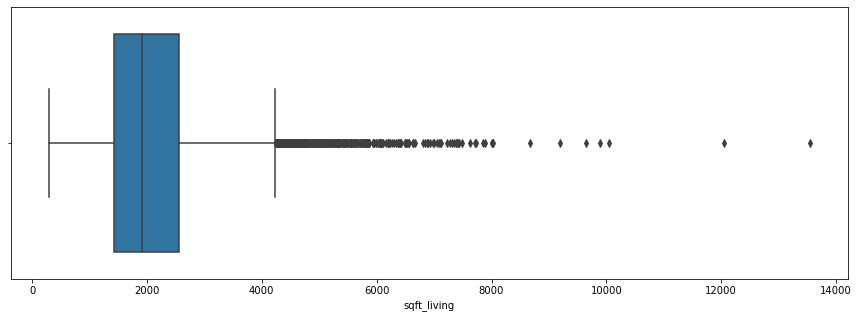

In [7]:
bpgraph=sns.boxplot(x='sqft_living', data=df)
bpgraph.figure.set_size_inches(15,5)

The graph above shows an asymetric distribution of the data and that it is positively skewed. This suggests the need to remove some of the outliers from the data. Below, we first continue our analysis with the data as is. Then we will define a rule for our outliers to be removed and repeat the analysis.

In [8]:
ind = df['sqft_living']
dep = df['price']
model = sm.OLS(dep, ind)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.839
Method:                 Least Squares   F-statistic:                          1.126e+05
Date:                Mon, 14 Mar 2022   Prob (F-statistic):                        0.00
Time:                        13:19:40   Log-Likelihood:                     -3.0032e+05
No. Observations:               21613   AIC:                                  6.006e+05
Df Residuals:                   21612   BIC:                                  6.006e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   263.0892      0.784    335.597      0.000     261.553     264.626
==============================================================================
Omnibus:                    16043.334   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           692411.859
Skew:                           3.130   Prob(JB):                         0.00
Kurtosis:                      30.013   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Verifying the Assumptions of Linear Regression

#### Checking the Linearity

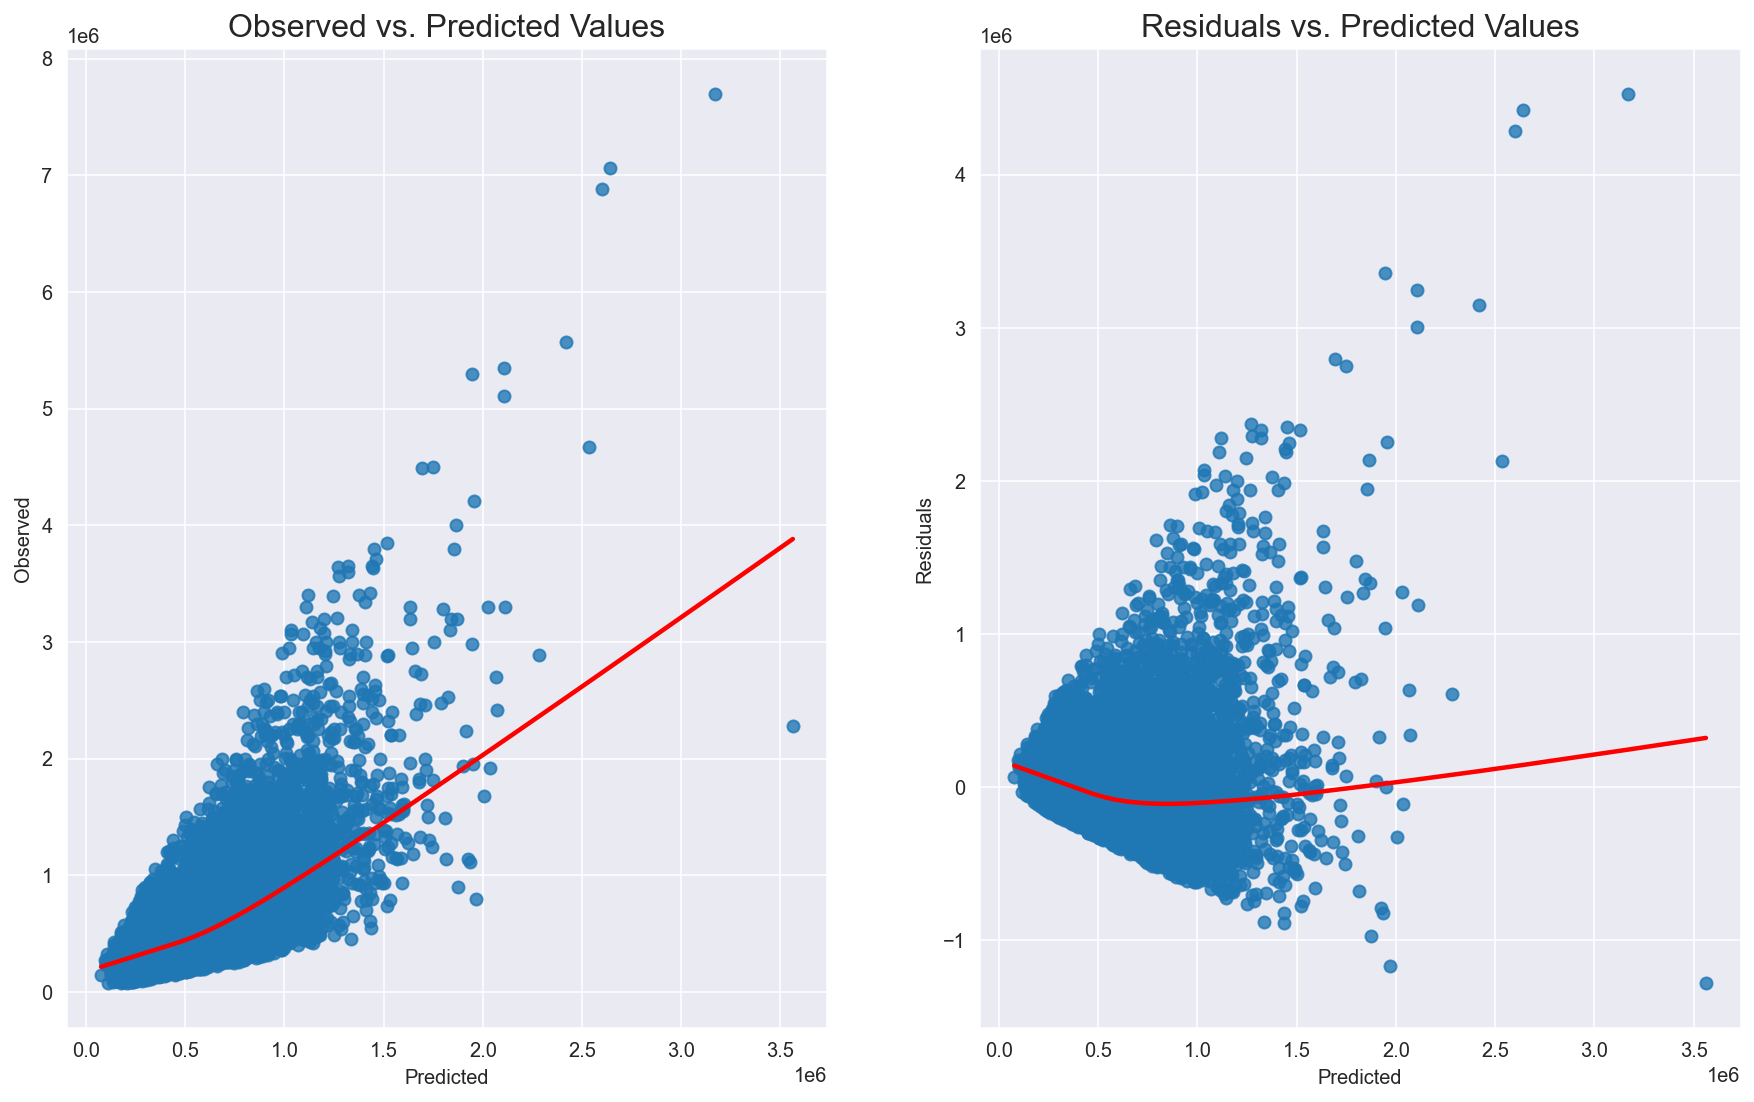

In [9]:
%config InlineBackend.figure_format ='retina'
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(results, dep)    

#### Checking the Expectation

In [10]:
results.resid.mean()

-7110.993960648369

#### Homoscedasticity 


 Breusch-Pagan test ----
                                     value
Lagrange multiplier statistic  1951.497871
p-value                                NaN
f-value                        2145.094089
f p-value                         0.000000

 Goldfeld-Quandt test ----
                value
F statistic  0.922754
p-value      0.999985

 Residuals plots ----


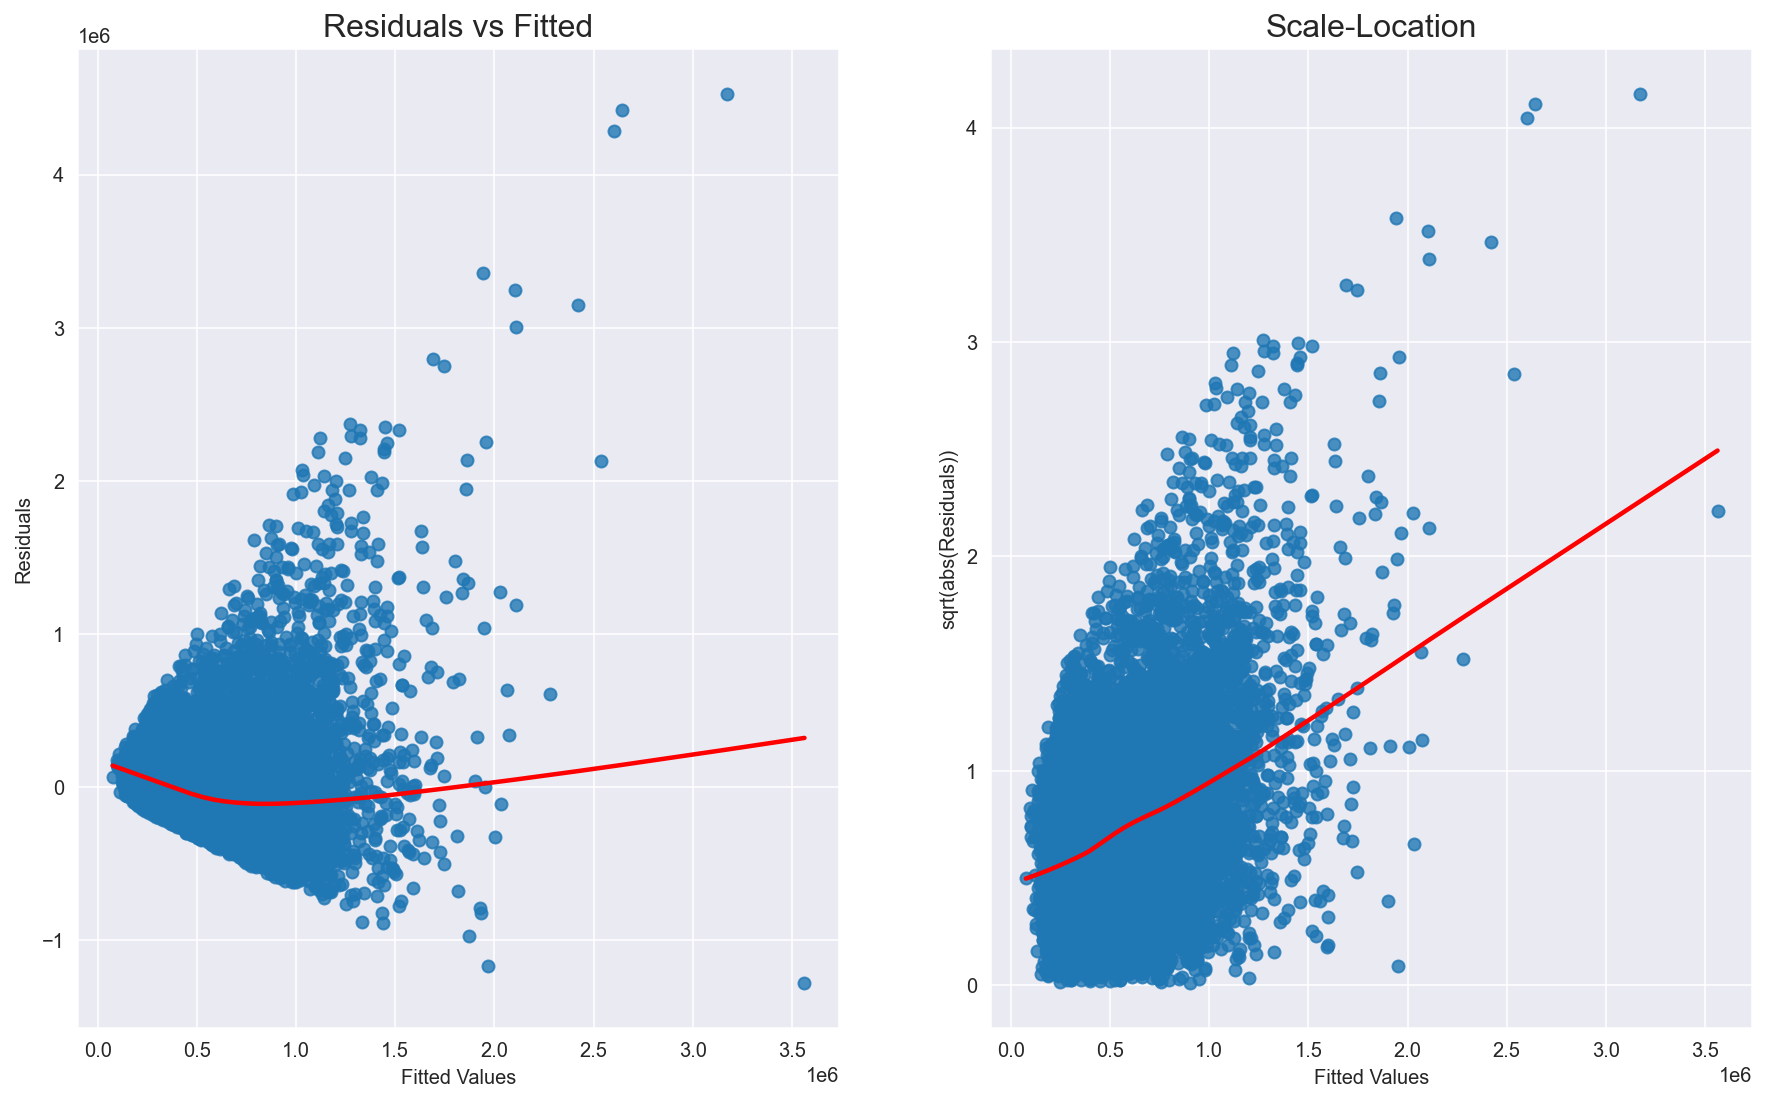

In [11]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(results)

In [ ]:
olsgraph = sns.regplot(x=ind, y=dep, scatter_kws={"color": "blue"}, line_kws={"color": "red"})
olsgraph.figure.set_size_inches(15,5)

In [ ]:
ind = df['condition']
dep = df['price']
model = sm.OLS(dep, ind)
results = model.fit()
results.summary()

## Removing the Outliers

In this phase, we define an arbitrary threshold and investigate the impact of excluding the outliers from the tests above.

#### Choosing a threshold

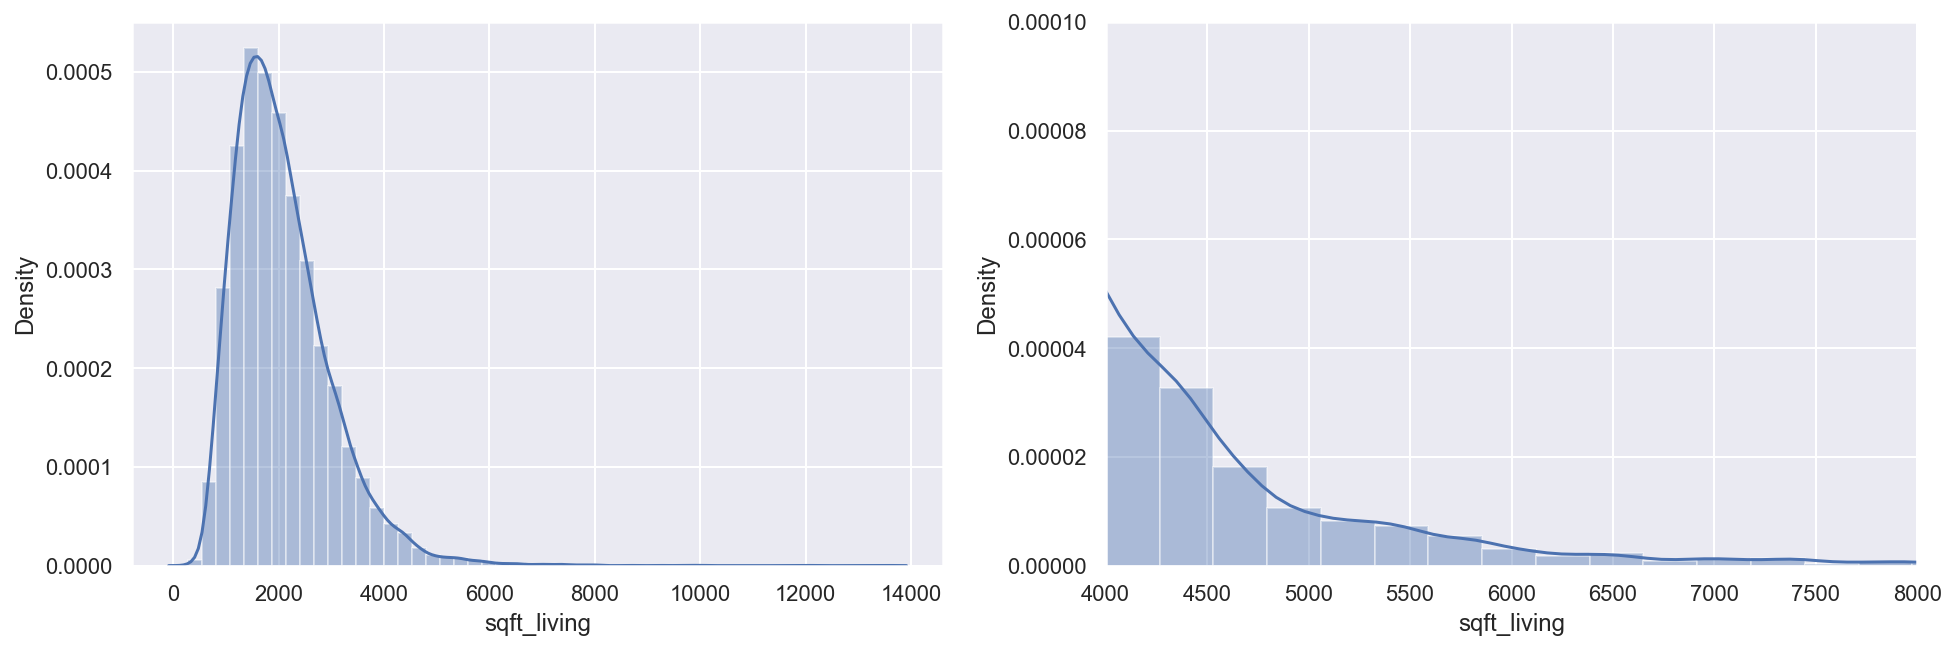

In [50]:
## Visualizing the distribution of sqft_living
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['sqft_living'])
plt.subplot(1,2,2)
sns.distplot(df['sqft_living'])
plt.xlim(4000,8000)
plt.ylim(0,.0001)

plt.show()
#plt.gcf().set_size_inches(15, 8)
#plt.xlim(5800,6200)

#### New dataset without outliers

In [52]:
dfnew = df[df['sqft_living']<6000]
dfnew.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.154500e+04,2.154500e+04,21545.000000,21545.000000,21545.000000,2.154500e+04,21545.000000,21545.000000,21545.000000,21545.000000,21545.000000,21545.000000,21545.000000,21545.000000,21545.000000,21545.000000,21545.000000,21545.000000,21545.000000,21545.000000
mean,4.582061e+09,5.333519e+05,3.365885,2.105918,2063.842191,1.490211e+04,1.492667,0.007194,0.229845,3.409886,7.644511,1776.243908,287.598283,1970.950476,84.111998,98078.019958,47.559924,-122.214120,1981.126526,12627.835461
std,2.876602e+09,3.368384e+05,0.925530,0.752242,870.947862,4.072378e+04,0.539360,0.084515,0.757675,0.651104,1.155363,797.198345,433.242072,29.361923,401.016407,53.496906,0.138700,0.140763,677.045700,26425.329995
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123700e+09,3.200000e+05,3.000000,1.500000,1420.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.470300,-122.329000,1484.000000,5100.000000
50%,3.904960e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.600000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571700,-122.231000,1840.000000,7620.000000
75%,7.312000e+09,6.400000e+05,4.000000,2.500000,2540.000000,1.062100e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2200.000000,560.000000,1997.000000,0.000000,98118.000000,47.678100,-122.125000,2360.000000,10059.000000
max,9.900000e+09,3.850000e+06,33.000000,7.500000,5990.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,5990.000000,2850.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,871200.000000


### Price and Sq. feet Living Space

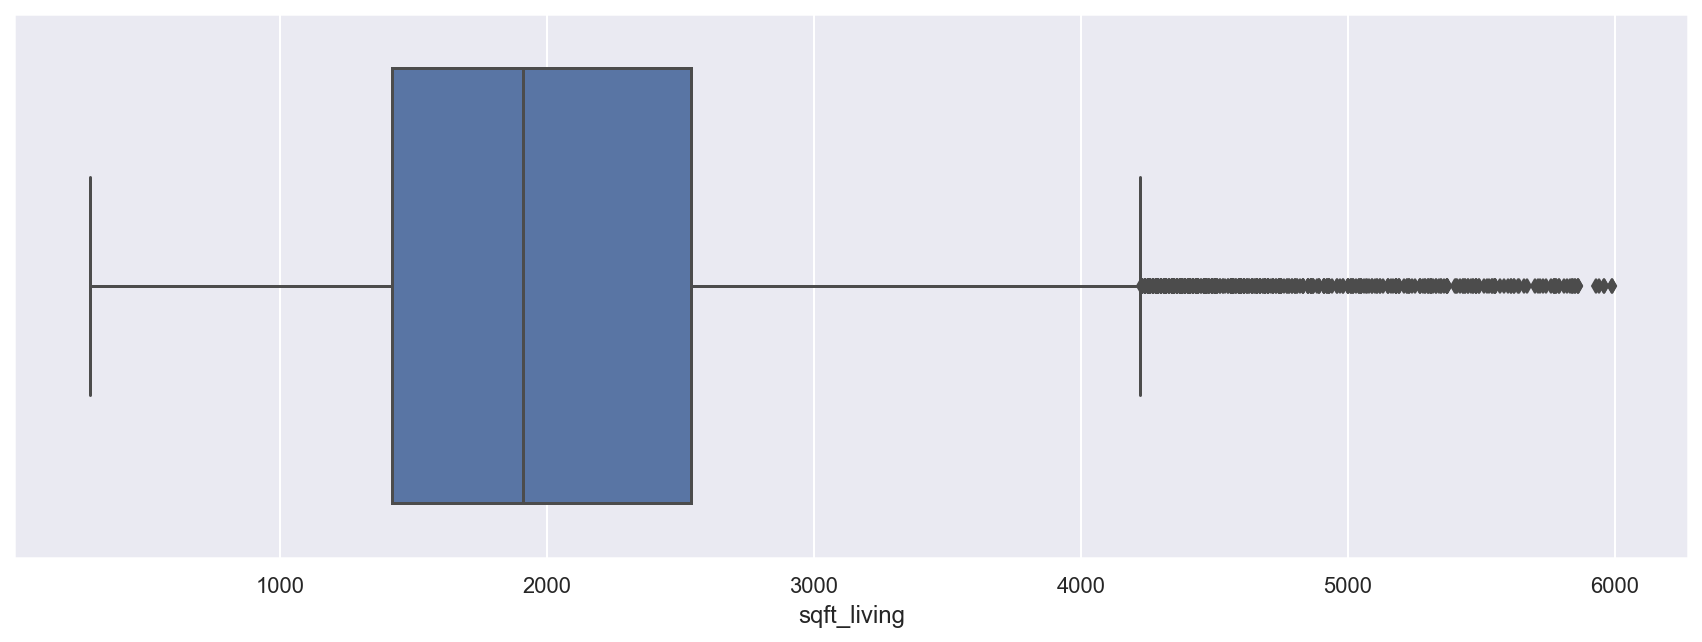

In [53]:
bpgraph=sns.boxplot(x='sqft_living', data=dfnew)
bpgraph.figure.set_size_inches(15,5)

In [54]:
ind = dfnew['sqft_living']
dep = dfnew['price']
model = sm.OLS(dep, ind)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.847
Model:                            OLS   Adj. R-squared (uncentered):              0.847
Method:                 Least Squares   F-statistic:                          1.188e+05
Date:                Thu, 24 Mar 2022   Prob (F-statistic):                        0.00
Time:                        13:08:42   Log-Likelihood:                     -2.9811e+05
No. Observations:               21545   AIC:                                  5.962e+05
Df Residuals:                   21544   BIC:                                  5.962e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
sqft_living   259.0908      0.752    344.709      0.000     257.618     260.564
==============================================================================
Omnibus:                    11631.227   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           163946.002
Skew:                           2.286   Prob(JB):                         0.00
Kurtosis:                      15.717   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Verifying the Assumptions of Linear Regression after removing Outliers

#### Checking the Linearity

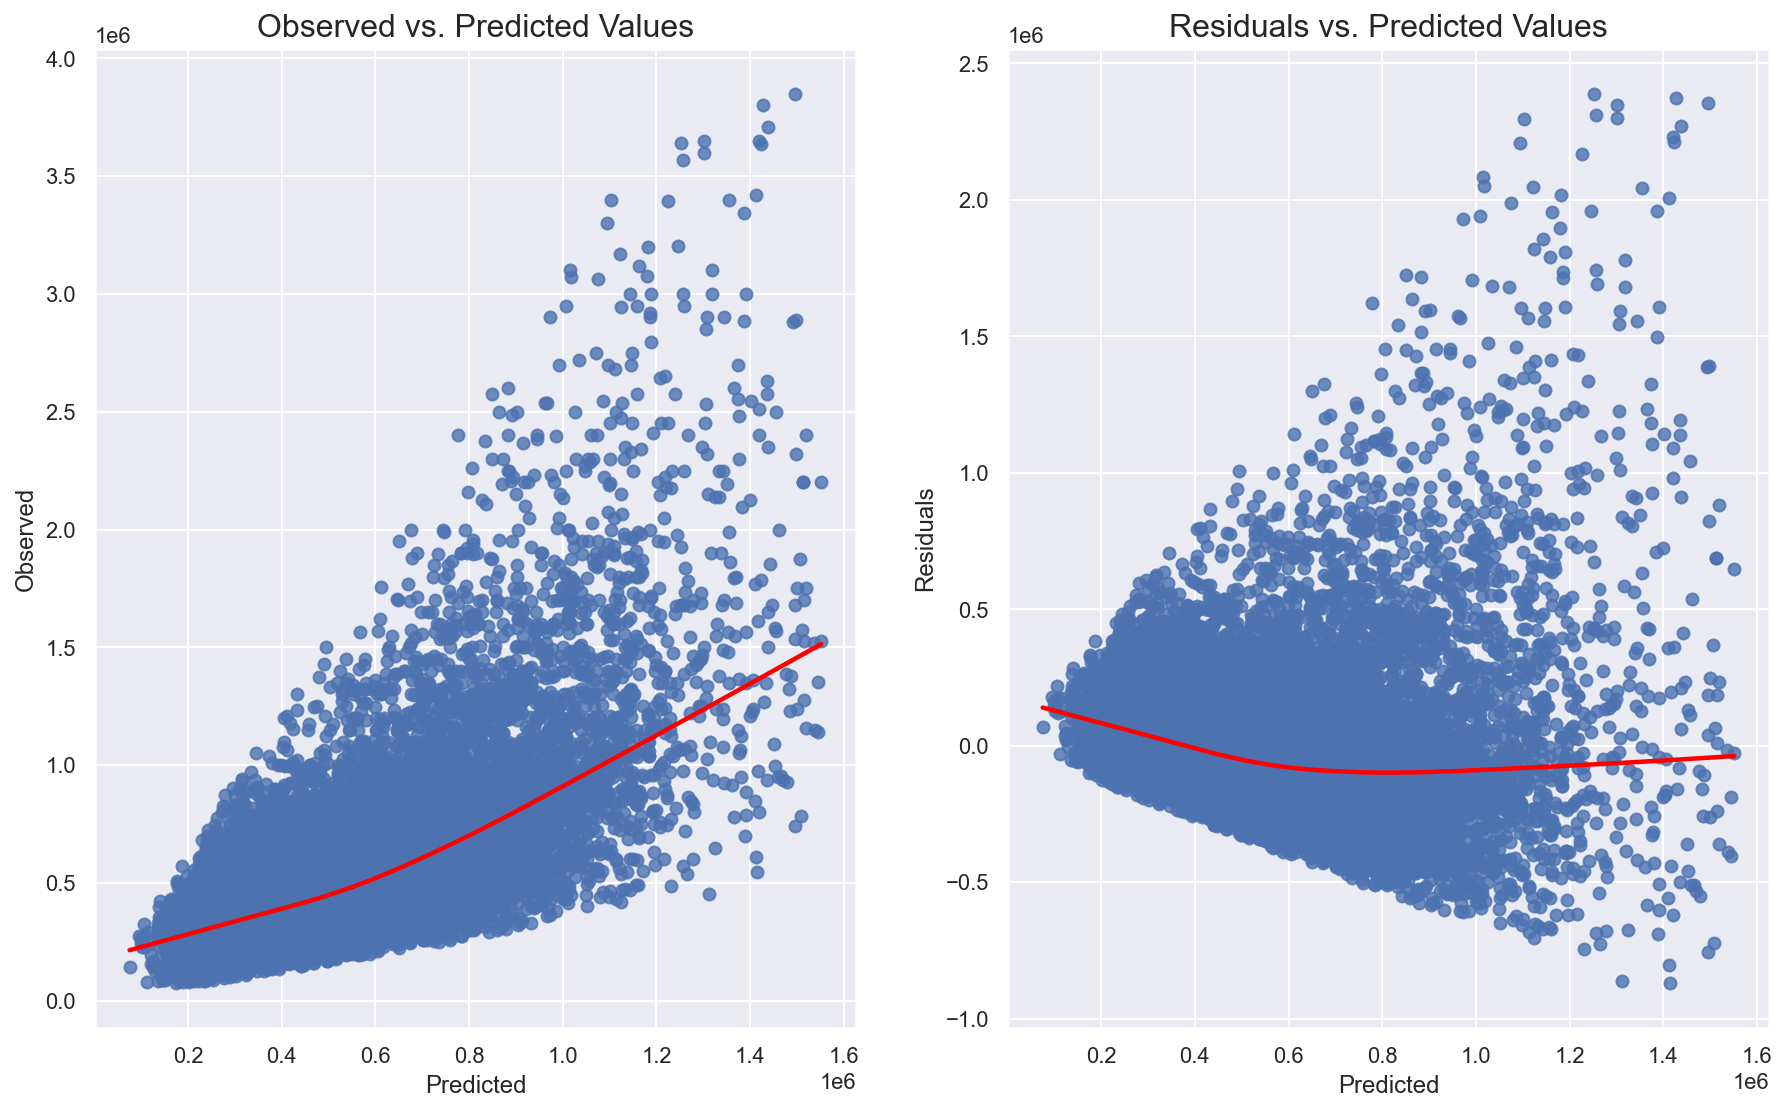

In [55]:
%config InlineBackend.figure_format ='retina'
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def linearity_test(model, y):
    '''
    Function for visually inspecting the assumption of linearity in a linear regression model.
    It plots observed vs. predicted values and residuals vs. predicted values.
    
    Args:
    * model - fitted OLS model from statsmodels
    * y - observed values
    '''
    fitted_vals = model.predict()
    resids = model.resid

    fig, ax = plt.subplots(1,2)
    
    sns.regplot(x=fitted_vals, y=y, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Observed vs. Predicted Values', fontsize=16)
    ax[0].set(xlabel='Predicted', ylabel='Observed')

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Residuals vs. Predicted Values', fontsize=16)
    ax[1].set(xlabel='Predicted', ylabel='Residuals')
    
linearity_test(results, dep)    

#### Checking the Expectation

In [59]:
results.resid.mean()

-1370.631428336821

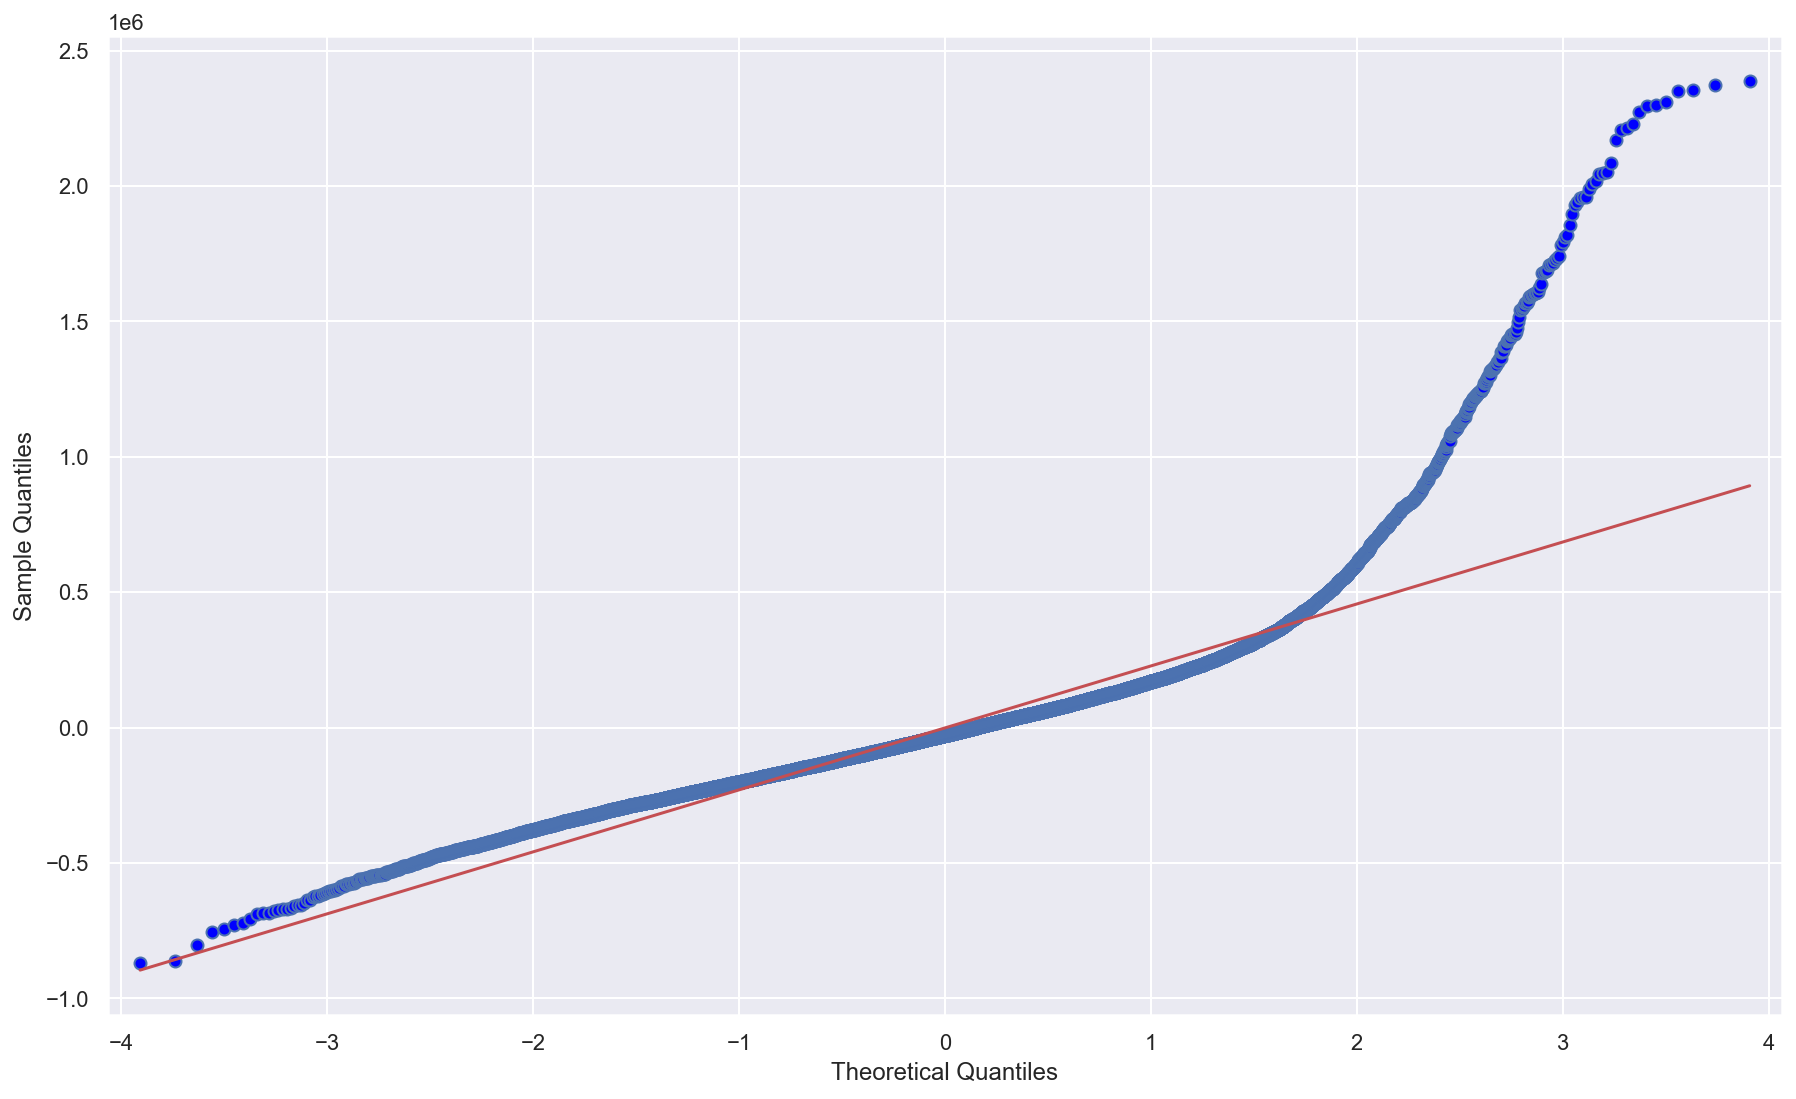

In [61]:
sm.qqplot(results.resid, line = 'r');

#### VIF

In [67]:
df_indvar = df.drop(df.columns[[0, 1, 2, 12, 13, 19, 20]], axis=1)
vif_data = pd.DataFrame()
vif_data['ind_var'] = df_indvar.columns
vif_data['VIF'] = [variance_inflation_factor(df_indvar.values, i)
                  for i in range(len(df_indvar.columns))]
vif_data

,ind_var,VIF
0,bedrooms,2.322844e+01
1,bathrooms,2.776097e+01
2,sqft_living,2.600747e+01
3,sqft_lot,1.233522e+00
4,floors,1.366882e+01
5,waterfront,1.210370e+00
6,view,1.481097e+00
7,condition,3.455130e+01
8,grade,1.311292e+02
9,yr_built,9.544428e+03


#### Homoscedasticity 


 Breusch-Pagan test ----
                                     value
Lagrange multiplier statistic  2643.779024
p-value                                NaN
f-value                        3013.433649
f p-value                         0.000000

 Goldfeld-Quandt test ----
                    value
F statistic  1.102199e+00
p-value      2.227292e-07

 Residuals plots ----


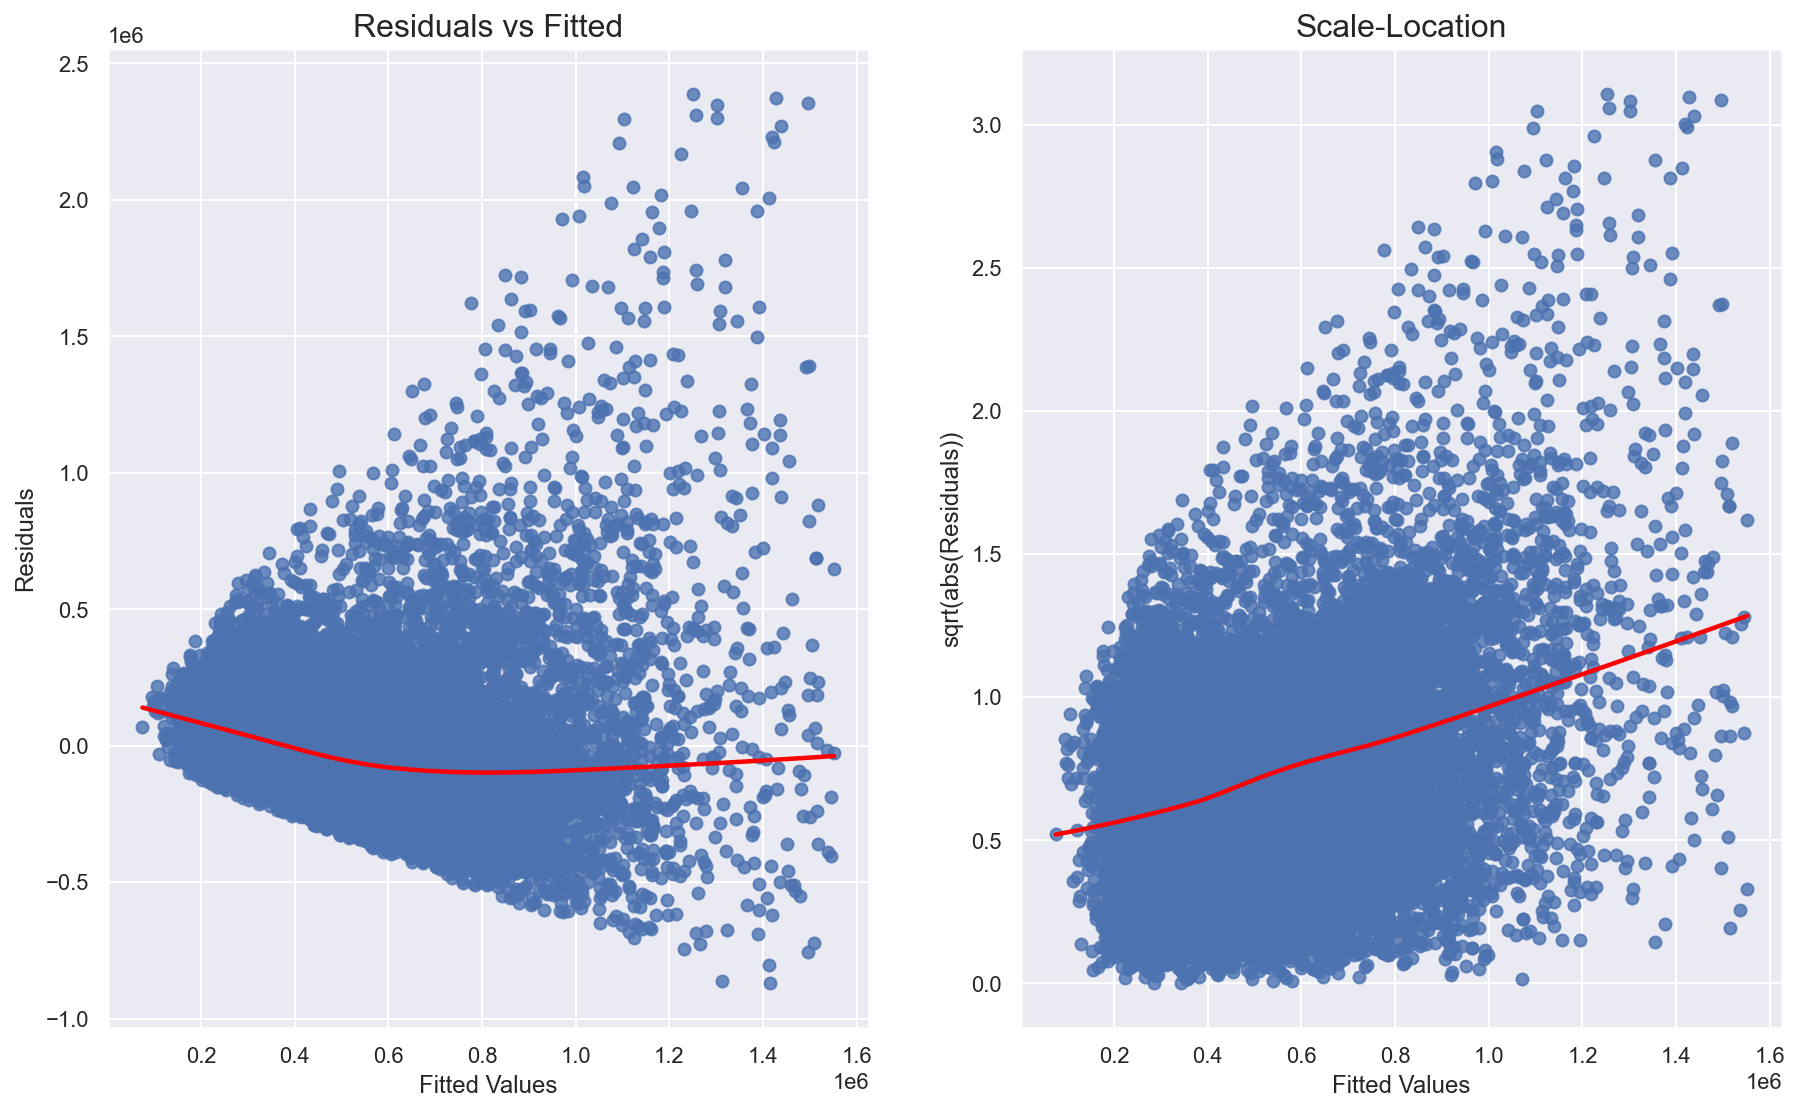

In [57]:
%matplotlib inline
%config InlineBackend.figure_format ='retina'
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.stats.api as sms
sns.set_style('darkgrid')
sns.mpl.rcParams['figure.figsize'] = (15.0, 9.0)

def homoscedasticity_test(model):
    '''
    Function for testing the homoscedasticity of residuals in a linear regression model.
    It plots residuals and standardized residuals vs. fitted values and runs Breusch-Pagan and Goldfeld-Quandt tests.
    
    Args:
    * model - fitted OLS model from statsmodels
    '''
    fitted_vals = model.predict()
    resids = model.resid
    resids_standardized = model.get_influence().resid_studentized_internal

    fig, ax = plt.subplots(1,2)

    sns.regplot(x=fitted_vals, y=resids, lowess=True, ax=ax[0], line_kws={'color': 'red'})
    ax[0].set_title('Residuals vs Fitted', fontsize=16)
    ax[0].set(xlabel='Fitted Values', ylabel='Residuals')

    sns.regplot(x=fitted_vals, y=np.sqrt(np.abs(resids_standardized)), lowess=True, ax=ax[1], line_kws={'color': 'red'})
    ax[1].set_title('Scale-Location', fontsize=16)
    ax[1].set(xlabel='Fitted Values', ylabel='sqrt(abs(Residuals))')

    bp_test = pd.DataFrame(sms.het_breuschpagan(resids, model.model.exog), 
                           columns=['value'],
                           index=['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'])

    gq_test = pd.DataFrame(sms.het_goldfeldquandt(resids, model.model.exog)[:-1],
                           columns=['value'],
                           index=['F statistic', 'p-value'])

    print('\n Breusch-Pagan test ----')
    print(bp_test)
    print('\n Goldfeld-Quandt test ----')
    print(gq_test)
    print('\n Residuals plots ----')

homoscedasticity_test(results)

### Multiple Linear Regression

In [69]:
predictors = ['sqft_living', 'condition']
x=df[predictors]
y=df['price']
lm = LinearRegression()
model = lm.fit(x,y)

In [70]:
print(f'alpha = {model.intercept_}')
print(f'betas = {model.coef_}')

alpha = -197179.9633524298
betas = [  282.45251637 43935.55883008]


In [71]:
ind = dfnew['sqft_living', 'condition']
dep = dfnew['price']
model = sm.OLS(dep, ind)
results = model.fit()
results.summary()

KeyError: ('sqft_living', 'condition')